In [51]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

In [52]:
img = cv2.imread('C:\\Users\\HP\\Desktop\\celeb_recogn\\Celebrity_Recognition\\denzel.jpg')
img.shape

(588, 474, 3)

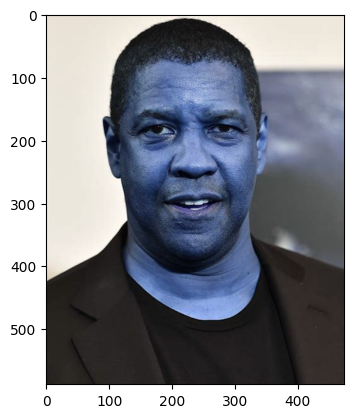

In [53]:
plt.imshow(img)

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(588, 474)

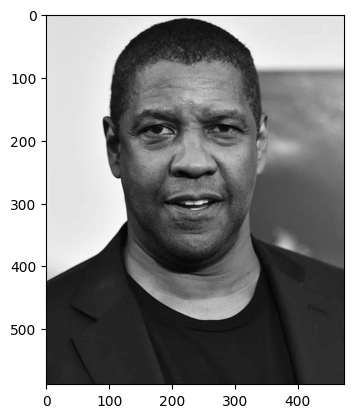

In [55]:
plt.imshow(gray, cmap='gray')

In [56]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\HP\\Desktop\\celeb_recogn\\Celebrity_Recognition\\haarcascades\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('C:\\Users\\HP\\Desktop\\celeb_recogn\\Celebrity_Recognition\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5) #scaleFactor=1.3, minNeighbours=5
faces

array([[ 86,  71, 281, 281]])

In [57]:
(x,y,w,h) = faces[0]
x,y,w,h

(86, 71, 281, 281)

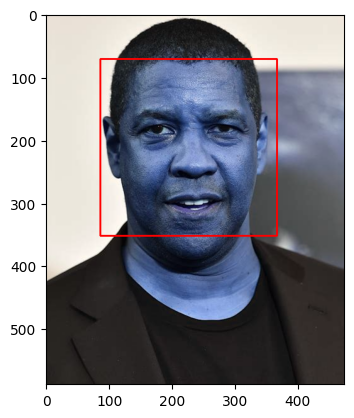

In [58]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

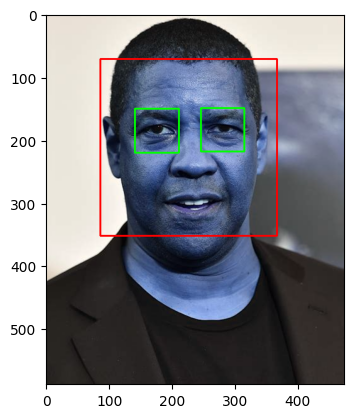

In [59]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

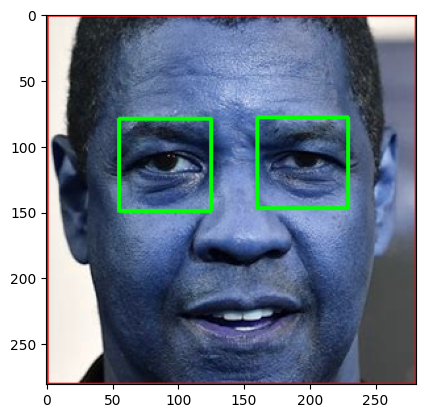

In [60]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [61]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

In [62]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [63]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [64]:
img_dirs

['./dataset/Angelina Jolie',
 './dataset/Brad Pitt',
 './dataset/Denzel Washington',
 './dataset/Hugh Jackman',
 './dataset/Jennifer Lawrence',
 './dataset/Johnny Depp',
 './dataset/Kate Winslet',
 './dataset/Leonardo DiCaprio',
 './dataset/Megan Fox',
 './dataset/Natalie Portman',
 './dataset/Nicole Kidman',
 './dataset/Robert Downey Jr',
 './dataset/Sandra Bullock',
 './dataset/Scarlett Johansson',
 './dataset/Tom Cruise',
 './dataset/Tom Hanks',
 './dataset/Will Smith']

In [65]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [67]:
cropped_image_dirs = []
celebrity_file_name_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name

            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1


Angelina Jolie
Generating cropped images in folder:  ./dataset/cropped/Angelina Jolie
Brad Pitt
Generating cropped images in folder:  ./dataset/cropped/Brad Pitt
Denzel Washington
Generating cropped images in folder:  ./dataset/cropped/Denzel Washington
Hugh Jackman
Generating cropped images in folder:  ./dataset/cropped/Hugh Jackman
Jennifer Lawrence
Generating cropped images in folder:  ./dataset/cropped/Jennifer Lawrence
Johnny Depp
Generating cropped images in folder:  ./dataset/cropped/Johnny Depp
Kate Winslet
Generating cropped images in folder:  ./dataset/cropped/Kate Winslet
Leonardo DiCaprio
Generating cropped images in folder:  ./dataset/cropped/Leonardo DiCaprio
Megan Fox
Generating cropped images in folder:  ./dataset/cropped/Megan Fox
Natalie Portman
Generating cropped images in folder:  ./dataset/cropped/Natalie Portman
Nicole Kidman
Generating cropped images in folder:  ./dataset/cropped/Nicole Kidman
Robert Downey Jr
Generating cropped images in folder:  ./dataset/cropp